# Práctica 2. Sistemas de ecuaciones


### 1. Introducción


El objetivo de esta práctica es resolver **sistemas de ecuaciones lineales** de la forma $Ax=b$, donde $A$ es la matriz de coeficientes, $x$ es un vector columna formado por las incógnitas y $b$ es un vector columna formado por los términos independientes. Veremos cómo resolver este sistema tanto de _forma directa_ como de _forma iterativa_.

In [ ]:
import numpy as np
from scipy import linalg as la

### 2. Operaciones elementales por filas y matrices asociadas


Como vimos en teoría, existen tres tipos de **operaciones elementales por filas** aplicables a una matriz $A$. A continuación se muestra su sencilla implementación en Python:


1. Permutar las filas $i$ y $j$ de $A$: `A[[i-1,j-1],:]=A[[j-1,i-1],:]`.
2. Multiplicar la fila $i$ de $A$ por un escalar $k \neq 0$: `A[i-1,:]=k*A[i-1,:]`.
3. Sumar a la fila $i$ de $A$ la fila $j$ multiplicada por $k\neq 0$: `A[i-1,:]=A[i-1,:]+k*A[j-1,:]`.


Apliquemos estas operaciones a la siguiente matriz, que representa la forma matricial de un sistema de ecuaciones lineales.

In [ ]:
A=np.array([[0,-2,3,9],[-4,6,0,-4],[2,-5,5,17]])
print(A)

In [ ]:
B=A.copy()                # guardamos en una nueva matriz B los primeros pasos del método de Gauss-Jordan

B[[0,2],:]=B[[2,0],:]     # intercambiamos las filas 1 y 3
print(B)

B[1,:]=0.5*B[1,:]         # dividimos la segunda fila por 2
print(B)

B[1,:]=B[1,:]+B[0,:]      # a la segunda fila le sumamos la primera
print(B)

Recordemos que aplicar una operación elemental por filas a una matriz $A$ es equivalente a premultiplicar $A$ por una **matriz elemental**. Comprobémoslo con las operaciones anteriores.

In [ ]:
E1=np.eye(3)[[2,1,0],:]                   # matriz elemental asociada al intercambio de filas 1 y 3
E2=np.eye(3)
E2[1,1]=1/2                               # matriz elemental asociada a dividir la segunda fila por 2
E3=np.eye(3)
E3[1,0]=1                                 # matriz elemental asociada a sumarle a la fila 2 la fila 1

print(E3@E2@E1@A)

### 3. Forma escalonada reducida (Gauss-Jordan)


Podríamos seguir operando "manualmente" para obtener la forma escalonada reducida de la matriz $A$, pero Python posee una instrucción que la calcula directamente. Para ello, debemos primeramente importar el paquete `sympy` y posteriormente aplicar la instrucción `sympy.Matrix(A).rref()`. Nos devolverá la **forma escalonada reducida** y también un vector que nos indica los índices de las columnas que se han ido usando como pivotes.

In [ ]:
import sympy

B=sympy.Matrix(A).rref()
print(B, "\n")

R=B[0]                    # asignamos a la variable R el primer elemento de B, i.e. la forma escalonada reducida de A
print(R, "\n")            # efectivamente, el primer elemento de B es la forma escalonada reducida de A
display(R)                # una forma más elegante de que Python muestre una matriz

### 4. Resolución de sistemas de ecuaciones


De la matriz $R$ anterior, podemos deducir que la **solución** del sistema de ecuaciones asociado a la matriz $A$ es $(1,0,3)$. Comprobémoslo.

In [ ]:
# A es una matriz ampliada correspondiente al sistema de ecuaciones siguiente:

# la matriz de coeficientes serían las tres primeras columnas de A, es decir, A[:,[0,1,2]]
# el vector de términos independientes sería la última columna de A, es decir, A[:,3:4]
# la solución del sistema es la última columna de la forma escalonada reducida R, es decir, R[:,3:4]

# comprobemos que (1,0,3) es solución del sistema

print(A[:,[0,1,2]]@R[:,3:4])
print(A[:,3:4])

Veamos ahora que el sistema $\begin{cases} x+ 2y + z = 4 \\ 2x + y - z = 2 \\ 7x + 8y + z = 16 \end{cases}$ es compatible indeterminado con solución $(\lambda, 2-\lambda, \lambda), \lambda\in \mathbb{R}$.

In [ ]:
A=np.array([[1,2,1,4],[2,1,-1,2],[7,8,1,16]])
R=sympy.Matrix(A).rref()

display(R[0])

Recordemos que la fórmula escalonada reducida también nos puede servir para hallar **inversas de matrices**. Veamos un ejemplo con la matriz $A$ inicial. Usaremos su inversa (calculada mediante el método de Gauss-Jordan) para resolver el sistema de ecuaciones asociado.

In [ ]:
A=np.array([[0,-2,3,9],[-4,6,0,-4],[2,-5,5,17]])
B=np.hstack([A[:,0:3],np.eye(3)])                    # matriz ampliada, adjuntando la matriz identidad a la derecha de A
print(B)

In [ ]:
B1=sympy.Matrix(B).rref()
B2=B1[0]

inversaB=B2[:,3:]                # recordemos que la inversa es la submatriz que queda a la derecha de la matriz ampliada
inversaB@(A[:,0:3])              # efectivamente, el producto de la inversa con A da la matriz identidad

In [ ]:
inversaB@A[:,3:]                 # otra forma de obtener que la solución del sistema inicial es (1,0,3)

Python también posee un comando para resolver directamente sistemas de ecuaciones. Se trata de `la.solve(A,b)` , donde $A$ es nuestra matriz de coeficientes y $b$ el vector de términos independientes.

In [ ]:
print(la.solve(A[:,0:3], A[:,3:]))

Sin embargo, si intentamos resolver el sistema compatible indeterminado que vimos antes, Python nos devolverá una solución también, aunque nos aparecerá un mensaje de _warning_ avisándonos de que posiblemente la matriz tenga determinante 0. Es por ello que, antes de usar `la.solve`, es preferible estudiar el rango o el determinante de la matriz de coeficientes.

In [ ]:
A=np.array([[1,2,1,4],[2,1,-1,2],[7,8,1,16]])
print(la.solve(A[:,0:3], A[:,3:]))

In [ ]:
la.det(A[:,0:3])            # efectivamente, A no es invertible, luego el sistema NO es compatible determinado

### 5. Resolución iterativa de sistemas de ecuaciones


En matemáticas computacionales, un **método iterativo** intenta resolver un problema a través de aproximaciones sucesivas a la solución, partiendo de una estimación inicial. Los métodos iterativos han demostrado su posible ventaja en la resolución de problemas lineales que involucran un gran número de variables (cientos, miles, millones...) porque la precisión de la solución puede ser determinada sin necesitar para ello un alto número de iteraciones.

A continuación estudiamos **el método de Jacobi** para la resolución de sistemas de ecuaciones lineales $Ax=b$. Necesitamos como hipótesis las dos siguientes condiciones:


1. Que el sistema sea compatible determinado (i.e. $|A|\neq 0$).
2. Que todos los elementos de la diagonal de $A$ sean no nulos.


Para ello, descomponemos $A=L+D+U$ como suma de una matriz triangular inferior $L$, una matriz diagonal $D$ y una matriz triangular superior $U$ (se suman, no confundir con la factorización LDU como producto!). Por ejemplo, si $A=\begin{pmatrix} 0&-2&3\\-4&6&0\\2&-5&5\end{pmatrix}$, entonces tomando $$L=\begin{pmatrix} 0&0&0\\-4&0&0\\2&-5&0 \end{pmatrix}, D=\begin{pmatrix} 0&0&0\\0&6&0\\0&0&5\end{pmatrix} \; \text{y} \; U=\begin{pmatrix} 0&-2&3\\0&0&0\\0&0&0\end{pmatrix},$$ claramente se cumple que $A=L+D+U$.

Por tanto, un vector $x$ es solución del sistema

$$ Ax=b \; \Longleftrightarrow \; (L+D+U)x=b \; \Longleftrightarrow \; Dx=b-(L+U)x \; \Longleftrightarrow \; x=D^{-1}[b-(L+U)x],$$ 

donde $D$ es invertible por la hipótesis 2 anterior y su inversa es muy sencilla de calcular (basta con hallar los inversos de cada uno de los elementos de la diagonal).


El **método de Jacobi** se basa en la igualdad anterior. Partiendo de una aproximación inicial $x_0$, calculamos $x_1=D^{-1}[b-(L+U)x_0]$, posteriormente $x_2=D^{-1}[b-(L+U)x_1]$, etc. Si esta sucesión $\{x_0, x_1, x_2, \ldots\}$ es _convergente_ , entonces su límite será solución del sistema. 


Veamos cómo funciona dicho método intentando resolver el sistema: $\begin{cases} 10x+3y+z=14 \\ 2x-10y+3z=-5\\ x+3y+10z=14\end{cases}$.

In [ ]:
M=np.array([[10,3,1,14],[2,-10,3,-5],[1,3,10,14]])
A=M[:,0:3]
b=M[:,3:]
print(A, "\n")       
print(la.det(A), "\n")     # observemos que A cumple ambas condiciones requeridas para el método de Jacobi
print(b)

Ahora realizamos la descomposición $A=L+D+U$. Para ello, aparte del conocido comando `np.diag(np.diag(A))` para hallar $D$, nos ayudaremos de las instrucciones `np.tril(A)` y `np.triu(A)`, las cuales nos devuelven las _partes triangulares inferiores y superiores_ de la matriz $A$, **incluyendo la diagonal** (la cual, por tanto, deberemos excluir restándole la matriz D).

In [ ]:
D=np.diag(np.diag(A))
print(D,"\n")

L=np.tril(A)               
print(L)                   # observemos que debemos quitarle la diagonal, luego le restamos D
L=np.tril(A)-D
print(L, "\n")

U=np.triu(A)-D
print(U, "\n") 

 
print(L+D+U)               # A=L+D+U

Partiendo, por ejemplo, del vector inicial (también llamado "punto semilla") $x_0=(0,0,0)$, realicemos 6 iteraciones del método de Jacobi. (Se puede empezar desde cualquier punto semilla, pero elegimos (0,0,0) por comodidad.)

In [ ]:
x0=np.array([[0],[0],[0]])   
x1=la.inv(D)@(b-(L+U)@x0)    # aplicamos el método de Jacobi, es decir, x1=D^(-1) * (b-(L+U)*x0)
x1                           # primera iteración del método de Jacobi, es decir, partiendo de x0 llegamos a x1

In [ ]:
x2=la.inv(D)@(b-(L+U)@x1)    
print(x2)                    # segunda iteración del método de Jacobi, es decir, partiendo de x1 llegamos a x2
x3=la.inv(D)@(b-(L+U)@x2)
print(x3)                    # tercera iteración del método de Jacobi, es decir, partiendo de x2 llegamos a x3
x4=la.inv(D)@(b-(L+U)@x3)
print(x4)                    # cuarta iteración
x5=la.inv(D)@(b-(L+U)@x4)    
print(x5)                    # quinta iteración
x6=la.inv(D)@(b-(L+U)@x5)
print(x6)                    # sexta iteración

Estas iteraciones también se pueden hacer de manera más compacta mediante un bucle _for_ .

In [ ]:
x=np.array([[0],[0],[0]])  
for i in range(6):
    x=la.inv(D)@(b-(L+U)@x)       # fijaos que si usamos un bucle for, el valor de x hay que ir sobreescribiéndolo.
print(x)                          # coincide obviamente con la iteración x6 calculada anteriormente

Podemos ver cómo las iteraciones tienden al vector $v=(1,1,1)$, el cual se puede comprobar que es solución del sistema. Trabajemos ahora con la matriz del principio de esta práctica, la cual representaba la matriz ampliada de un sistema de ecuaciones lineales con solución $(1,0,3)$.

In [ ]:
M=np.array([[0,-2,3,9],[-4,6,0,-4],[2,-5,5,17]])
A=M[:,0:3]
b=M[:,3:]
print(A)
print(b)

$A$ no cumple la hipótesis 2, pero bastará con permutar las filas 1 y 3 (de $A$ y de $b$, o lo que es lo mismo, de $M$) para que sí la cumpla. Esto no afecta a nuestro sistema, pues se trata del mismo sistema de ecuaciones (pero con las ecuaciones intercambiadas). Además, $A$ cumple la condición 1 pues ya vimos que tenía inversa.

In [ ]:
M=M[[2,1,0],:]
A=M[:,0:3]
b=M[:,3:]
print(A)
print(b)

Aplicamos ahora el método de Jacobi, con 10 iteraciones, partiendo también del punto semilla $(0,0,0)$.

In [ ]:
D=np.diag(np.diag(A))
L=np.tril(A)-D
U=np.triu(A)-D
x=np.array([[0],[0],[0]])  
for i in range(10):
    x=la.inv(D)@(b-(L+U)@x)   
print(x)

In [ ]:
# observemos la diferencia de escribir "print(x)" a la altura del bucle for (lo que hemos hecho arriba),
# o un espacio a la derecha del bucle for (lo que vamos a hacer ahora)


x=np.array([[0],[0],[0]])  
for i in range(10):
    x=la.inv(D)@(b-(L+U)@x)   
    print(x)

En este caso, podemos ver cómo las iteraciones van fluctuando y haciéndose cada vez más grandes los valores, luego **no podemos afirmar** que el método de Jacobi converge a una solución. ¿Porqué pasa esto? Porque aunque $A$ cumpla ambas condiciones requeridas, el método puede no converger, i.e. son _condiciones necesarias pero no suficientes_ . Veamos una importante propiedad que sí que nos permitirá asegurar la existencia de un vector límite.


**Definición.** Una matriz cuadrada $A$ es **estrictamente diagonalmente dominante** (por filas) si en todas las filas el valor absoluto del elemento de la diagonal es más grande que la suma de los valores absolutos del resto de los elementos de esta fila. Es decir, para todo $i$ se cumple que $|a_{ii}|>\displaystyle\sum_{j\neq i} |a_{ij}|$.


**Teorema.** Si una matriz cuadrada $A$ es _estrictamente diagonalmente dominante_ , entonces el método de Jacobi converge.


Como podemos comprobar, la matriz $\begin{pmatrix} 10&3&1\\ 2&-10&3\\1&3&10\end{pmatrix}$ sí es estrictamente diagonal dominante, luego aplicando el teorema anterior ya podíamos afirmar que el método de Jacobi iba a converger. Sin embargo, la matriz $\begin{pmatrix} 0&-2&3\\-4&6&0\\2&-5&5\end{pmatrix}$, aparte de no cumplir la condición 1, no es estrictamente diagonal dominante ni tras intercambiar las filas 1 y 3, por lo que a priori no sabíamos si el método iba a converger o no.

En resumen, si la matriz de coeficientes es estrictamente diagonal dominante, el método de Jacobi **siempre converge**. En cambio, si no es estrictamente diagonal dominante, **puede converger o puede que no**, puede pasar cualquier cosa.

### 6. Aplicaciones: redes de flujo


Cuando investigamos el **flujo** de una cantidad **a través de una red** nos aparecen **sistemas de ecuaciones lineales**. Estas redes las podemos encontrar en diversos campos de la ciencia, economía, estadística o ingeniería. Dos ejemplos de este tipo son los patrones de flujo de tráfico a través de una ciudad y la distribución de productos de los fabricantes a los consumidores por medio de una red de distribuidores y vendedores.


Una red consta de un conjunto de puntos, llamados nodos (o vértices), y arcos dirigidos que conectan todos o parte de los nodos. El flujo está indicado por un número o una variable. Un flujo de redes tiene que cumplir las siguientes condiciones:


1. El flujo total que entra a un nodo es igual al flujo total que sale del nodo.
2. El flujo total que entra dentro de la red es igual al flujo total que sale de la red.



**Ejemplo.** Consideremos una pequeña red cerrada de tubos a través de los cuales fluye un líquido como se describe en el siguiente grafo:


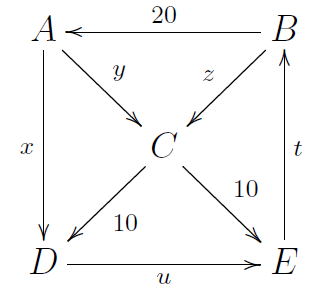

Los arcos representan los tubos y las intersecciones entre los tubos corresponden a los nodos de la red. El peso de cada arco indica la cantidad de litros de líquido que fluye por hora y las flechas indican las direcciones de los flujos.


A partir de las condiciones básicas de todo flujo de redes y de la descripción de la red concreta, podemos obtener el siguiente sistema de ecuaciones, donde cada nodo da lugar a una ecuación lineal.


- Nodo A: $x + y = 20$
- Nodo B: $z + 20 = t$
- Nodo C: $y + z = 20$
- Nodo D: $x + 10 = u$
- Nodo E: $u + 10 = t$

Para resolver el sistema, escribimos su matriz ampliada y hallamos su forma escalonada reducida.

In [ ]:
M=np.array([[1,1,0,0,0,20],[0,0,1,-1,0,-20],[0,1,1,0,0,20],[1,0,0,0,-1,-10],[0,0,0,-1,1,-10]])

B=sympy.Matrix(M).rref()
B[0]

Como se puede ver, el sistema es compatible indeterminado con solución $(-10 + \lambda, 30 -\lambda, -10 + \lambda, 10 + \lambda, \lambda)$, con $\lambda \in \mathbb{R}$. Como las incógnitas son litros, tienen que ser mayores o iguales que cero, luego $10\leq \lambda \leq 30$. Concluimos que hay una cantidad infinita de posibilidades para la distribución de flujos (una para cada valor de $\lambda$ en el intervalo $[10, 30]$).

### 7. Ejercicios


1. Sea $C = \begin{pmatrix} 0& 6 &13\\ 0 &2 &4\\ 1& 0& 0 \end{pmatrix}$. Calcula (a mano) cuatro matrices elementales tales que $\mathcal{E}_4\mathcal{E}_3\mathcal{E}_2\mathcal{E}_1 C = I_{3}$. Comprueba (con Python) que tal producto es $I_3$.


2. Estudia el número de soluciones del siguiente sistema y comprueba mediante `sympy.Matrix().rref()` si es compatible. Además, estudia (usando Python) si $(\frac{33}{2},-11,\frac{5}{2}, \frac{1}{2})$ y $(\frac{33}{2},-11,\frac{11}{2},\frac{1}{2})$ son soluciones o no. 

$$ \begin{cases} x + y - z + 2t = 1 \\ 2x + 3y + 4t = 2 \\ y + z + 3t = -4 \\ -x - 2y - z - 2t = -1  \end{cases}$$


3. Considera el sistema de ecuaciones siguiente. 

$$\begin{cases} 0.2x + 2.2y + 4.5z = 0.7 \\ 1.3x + 3.7y + 2.1z = 1.2 \\ 4.2x + 3.1y + 0.4z = 5.2 \end{cases}$$

- Tomando el vector nulo como aproximación inicial, obtén 20 aproximaciones aplicando el método de Jacobi. ¿Es convergente dicho método?
- Reordena las ecuaciones de este sistema para que su matriz asociada sea estrictamente diagonal dominante. Comprueba que en ese caso el método de Jacobi converge y calcula la aproximación obtenida usando 20 iteraciones.


4. Una placa metálica cuadrada tiene una temperatura constante en cada uno de sus cuatro bordes. Para calcular la temperatura en puntos del interior de la misma, se superpone una rejilla virtual conectando puntos del borde con puntos interiores (ver el ejemplo en la figura) y se supone que la temperatura en cada punto interior es el promedio de las temperaturas en los 4 puntos a los que está conectado por medio de la rejilla. 

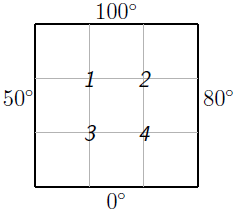

Así, si $T_i$ denota la temperatura en el punto $i$, tenemos que, por ejemplo, $T_1 = \frac{1}{4}(50 + 100 + T_2 + T_3)$. Calcula las aproximaciones de las temperaturas en los 4 puntos internos de la rejilla con el método de Jacobi, usando 11 iteraciones y a partir de una aproximación inicial nula.


5. En la figura siguiente se muestra el flujo de tráfico (en vehículos por hora) en una red de calles (los nodos del grafo representan las intersecciones). Encuentra las dependencias entre los flujos de tráfico de las calles. ¿Cuál es el flujo de tráfico cuando $u = 50$, $z = 150$?

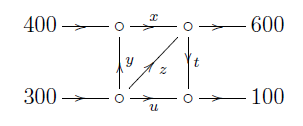